In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'MS Gothic']

play_info = pd.read_csv('play_info.csv', encoding='cp932', on_bad_lines='skip', engine='python')
print(play_info.shape)


(254361, 208)


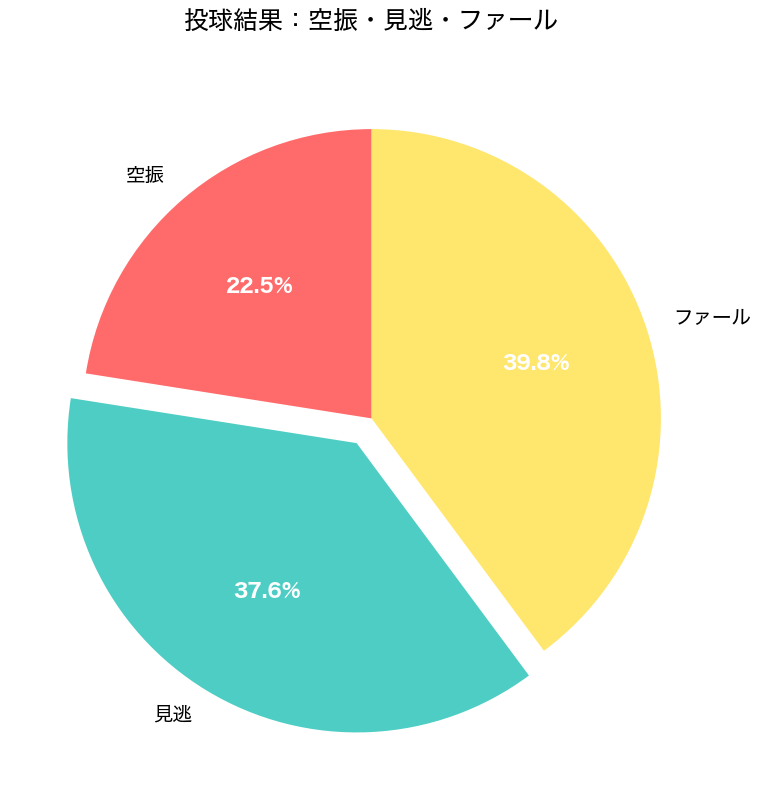

空振: 25,913球 (22.5%)
見逃: 43,325球 (37.6%)
ファール: 45,861球 (39.8%)


In [ ]:
pitch_results = play_info['pitch_result'].dropna()

categories = {
    '空振': pitch_results.str.contains('空振', na=False).sum(),
    '見逃': pitch_results.str.contains('見逃', na=False).sum(),
    'ファール': pitch_results.str.contains('ファウル|ファ', na=False).sum()
}

labels = list(categories.keys())
sizes = list(categories.values())
colors = ['#ff6b6b', '#4ecdc4', '#ffe66d']
explode = (0.1, 0.1, 0.1)

plt.figure(figsize=(10,8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, 
                                    autopct='%1.1f%%', startangle=90, 
                                    explode=explode, textprops={'fontsize': 14})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

plt.title('投球結果：空振・見逃・ファール', fontsize=18, pad=20)
plt.tight_layout()
plt.show()

total = sum(sizes)
for label, size in categories.items():
    print(f"{label}: {size:,}球 ({size/total*100:.1f}%)")
